In [5]:
import xarray as xr
import numpy as np

In [6]:
filename_sst = 'F:/data/sst/hadisst/HadISST_sst.nc'
#filename_sst = 'C:/Users/gentemann/Desktop/HadISST_sst.nc' #"F:/data/sst/hadisst/HadISST_sst.nc"
ds_sst=xr.open_dataset(filename_sst)

In [7]:
ds_sst

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, nv: 2, time: 1783)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 85.5 84.5 83.5 82.5 ...
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 ...
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    12/9/2018 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary info

In [39]:
#calculate frequency timeseries > 90th percentile, remove trends in data
ds2=ds_sst.where(ds_sst.sst>-10)  #put all sst values < -10 to nan
annual_mean = ds2.rolling(time=12, center=True).mean()
ds3 = ds2-annual_mean  #take out annual mean to remove trends
climatology_mean = ds3.groupby('time.month').mean('time')  #calculate monthly climatology to take out seasonal cycle
anomalies = ds3.groupby('time.month') - climatology_mean  #calculate anomaly timeseries 
perc = anomalies.groupby('time.month').reduce(np.nanpercentile, dim='time', q=0.90)  #caluclate 90th percentile
anomalies_perc = anomalies.groupby('time.month')/perc  #calculate anomaly fraction of 90th percentile
perc_sum_data=anomalies_perc.where(anomalies_perc.sst>=1) #save when data >= 90th percentile
norm = perc_sum_data / perc_sum_data  #this will put 1 where >=1 for summing
psum = norm.groupby('time.year').sum(dim='time')  #sum over each year

#calculate frequency timeseries > 90th percentile, do NOT remove trends in data
ds2=ds_sst.where(ds_sst.sst>-10)  #put all sst values < -10 to nan
climatology_mean = ds2.groupby('time.month').mean('time')  #calculate monthly climatology to take out seasonal cycle
anomalies = ds2.groupby('time.month') - climatology_mean  #calculate anomaly timeseries 
perc = anomalies.groupby('time.month').reduce(np.nanpercentile, dim='time', q=0.90)  #caluclate 90th percentile
anomalies_perc = anomalies.groupby('time.month')/perc  #calculate anomaly fraction of 90th percentile
perc_sum_data=anomalies_perc.where(anomalies_perc.sst>=1) #save when data >= 90th percentile
norm = perc_sum_data / perc_sum_data  #this will put 1 where >=1 for summing
psum2 = norm.groupby('time.year').sum(dim='time')  #sum over each year


C:\Users\gentemann\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1172: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
C:\Users\gentemann\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1172: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


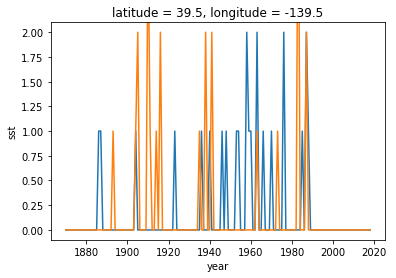

In [40]:
psum.sst[:,50,40].plot()
psum2.sst[:,50,40].plot()
#anomalies_perc.sst[:,100,40].plot()
#climatology_std.sst[:,100,40].plot()
#(ds2.sst[:,100,40]-annual_mean.sst[:,100,40]).plot()
#a=anomalies_perc.groupby('time.year').sum()
#a

In [35]:
#print(anomalies.latitude[40],anomalies.longitude[30])


In [37]:
#print(norm.sst[1:200,50,40])
#hot = (ds2['sst'] >= climatology['sst']+climatology_std['sst']).groupby('time.month').mean('time')

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, nv: 2, year: 149)
Coordinates:
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 85.5 84.5 83.5 82.5 ...
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 ...
  * year       (year) int64 1870 1871 1872 1873 1874 1875 1876 1877 1878 ...
Dimensions without coordinates: nv
Data variables:
    time_bnds  (year, nv, latitude, longitude) float64 0.0 0.0 0.0 0.0 0.0 ...
    sst        (year, latitude, longitude) float64 0.0 0.0 0.0 0.0 0.0 0.0 ...


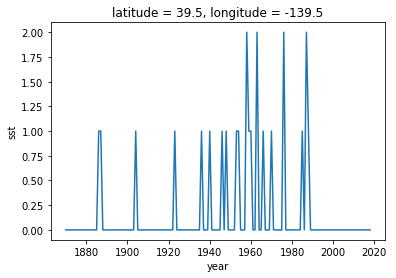

In [38]:
print(psum)
#stand_anomalies = xr.apply_ufunc(lambda x, m, s: x, # - (m + s),
#   ....:                         ds2.groupby('time.month'),
#   ....:                         climatology_mean, climatology_std)

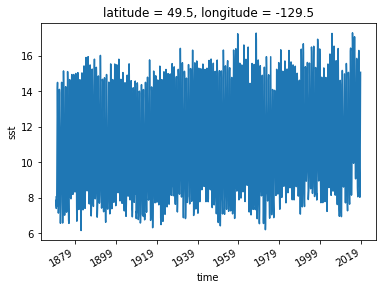

In [92]:
#stand_anomalies.sst[:,40,50].plot()

C:\Users\gentemann\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1172: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


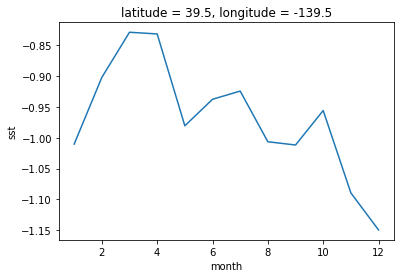

In [108]:
perc.sst[:,50,40].plot()

In [109]:
climatology_mean

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, month: 12, nv: 2)
Coordinates:
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 85.5 84.5 83.5 82.5 ...
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 ...
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nv
Data variables:
    time_bnds  (month, nv, latitude, longitude) float32 nan nan nan nan nan ...
    sst        (month, latitude, longitude) float32 nan nan nan nan nan nan ...